# Notebook Structure
1. Business Objective & Questions
2. Data Loading & Basic Validation
3. Dataset Overview (Schema, Size, Types)
4. Univariate Analysis
5. Bivariate Analysis
6. Multivariate Analysis
7. Key Business Insights (Written, Not Plots)
8. Risks & Implications for Modeling

## Data Loading

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use("default")
sns.set_context("notebook")

In [15]:
DATA_PATH = Path("../data/raw/SuperStoreDataset.csv")

df = pd.read_csv(DATA_PATH, encoding='latin-1')
df.shape

(9994, 21)

In [16]:
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,09-05-2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## Univariate Analysis

In [ ]:
PLOT_PATH = Path("../visualizations/eda_plots")
PLOT_PATH.mkdir(parents=True, exist_ok=True)
def save_plot(filename):
    plt.savefig(
        PLOT_PATH / filename,
        bbox_inches="tight",
        dpi=150
    )

1. Sales Distribution

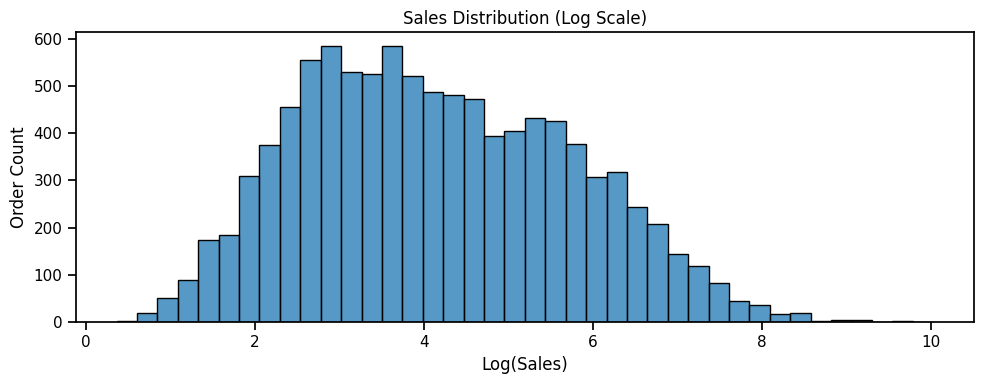

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(np.log1p(df["Sales"]), bins=40)
plt.title("Sales Distribution (Log Scale)")
plt.xlabel("Log(Sales)")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

2. Profit Distribution

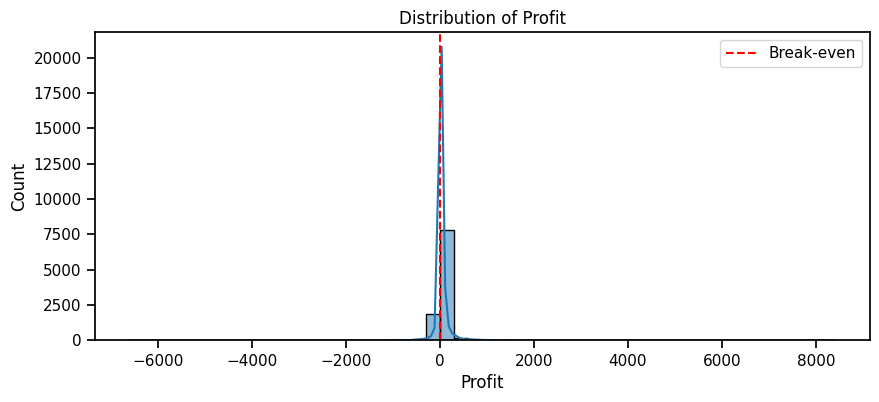

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(df["Profit"], bins=50, kde=True)
plt.axvline(0, color="red", linestyle="--", label="Break-even")
plt.title("Distribution of Profit")
plt.legend()
plt.show()

3. Discount Levels

In [33]:
df["Discount"].value_counts().sort_index()

Discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: count, dtype: int64

## Bivariate Analysis - What Relates to What?

1. Sales vs Profit

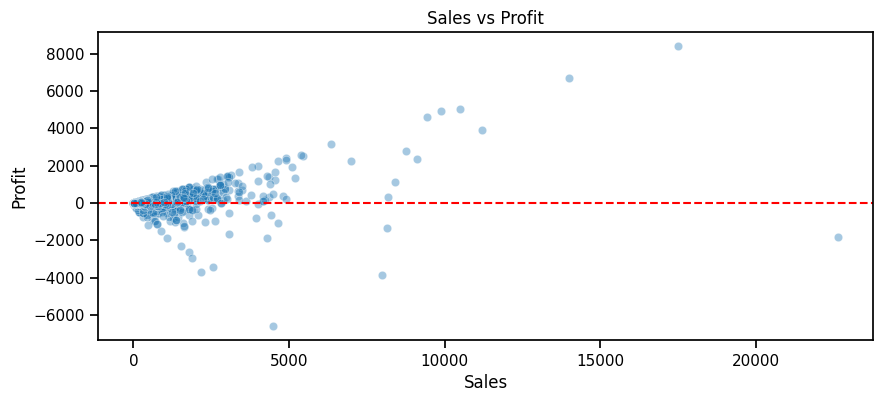

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="Sales", y="Profit", alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
save_plot("sales_vs_profit.png")
plt.show()

2. Discount vs Profit

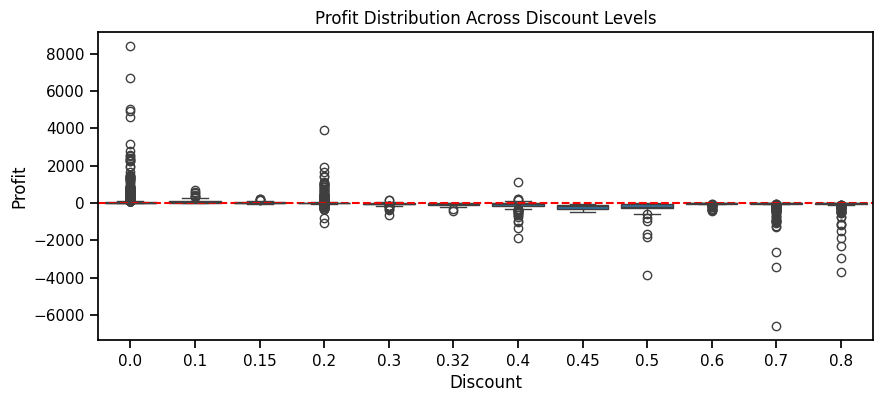

In [40]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="Discount", y="Profit")
plt.axhline(0, color="red", linestyle="--")
plt.title("Profit Distribution Across Discount Levels")
plt.show()

3. Category-Level Profitability

In [27]:
category_summary = (
    df.groupby("Category")[["Sales", "Profit"]]
      .sum()
      .sort_values("Profit")
)

category_summary

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


## Multivariate Analysis

1. Profit by Category & Region

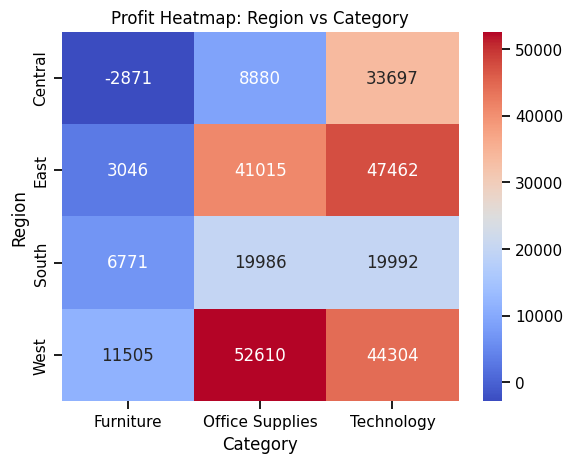

In [41]:
pivot = pd.pivot_table(
    df,
    values="Profit",
    index="Region",
    columns="Category",
    aggfunc="sum"
)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Profit Heatmap: Region vs Category")
plt.show()